# Naive Bayes - Wine Dataset

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold, cross_val_predict

from utils import evaluate_cross_validation, evaluation, evaluation_all_features, discretize_dataset, print_score

## Dataset analysis

In [2]:
dataset_raw = datasets.load_wine()

feature_names = dataset_raw['feature_names']
class_names = dataset_raw['target_names']
class_column_name = 'species'

dataset = pd.DataFrame(dataset_raw['data'], columns=feature_names)
dataset['y'] = dataset_raw['target']
dataset[class_column_name] = dataset['y'].apply(lambda x: class_names[x])

In [3]:
dataset.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  y  species  
0                          3.92   1065.0  0  class_0  
1                          3.40   1050.0  0  class_0  
2                          3.17   1185.0  0  class_0  
3                          3.45   1480.0  0  class_0  
4                          2.93    735.0  0  class_0

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  y    

In [5]:
dataset[feature_names].describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [6]:
dataset_numeric = dataset[feature_names]
dataset_numeric = dataset_numeric.apply(pd.to_numeric, errors='coerce')

In [7]:
dataset[dataset.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, y, species]
Index: []

In [8]:
dataset[dataset.duplicated()].head()

Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, y, species]
Index: []

## Dataset preprocessisng

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
dataset[feature_names].describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

## Dataset visualization

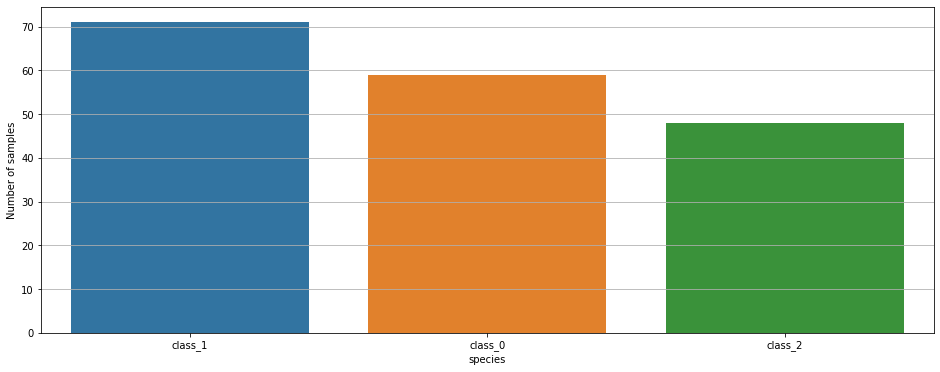

In [12]:
dataset_class_counts = dataset[class_column_name].value_counts()
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.ylabel('Number of samples')
plt.xlabel(class_column_name)
sns.barplot(dataset_class_counts.index, dataset_class_counts.values)
plt.savefig('plots/wine_class_dist.png')

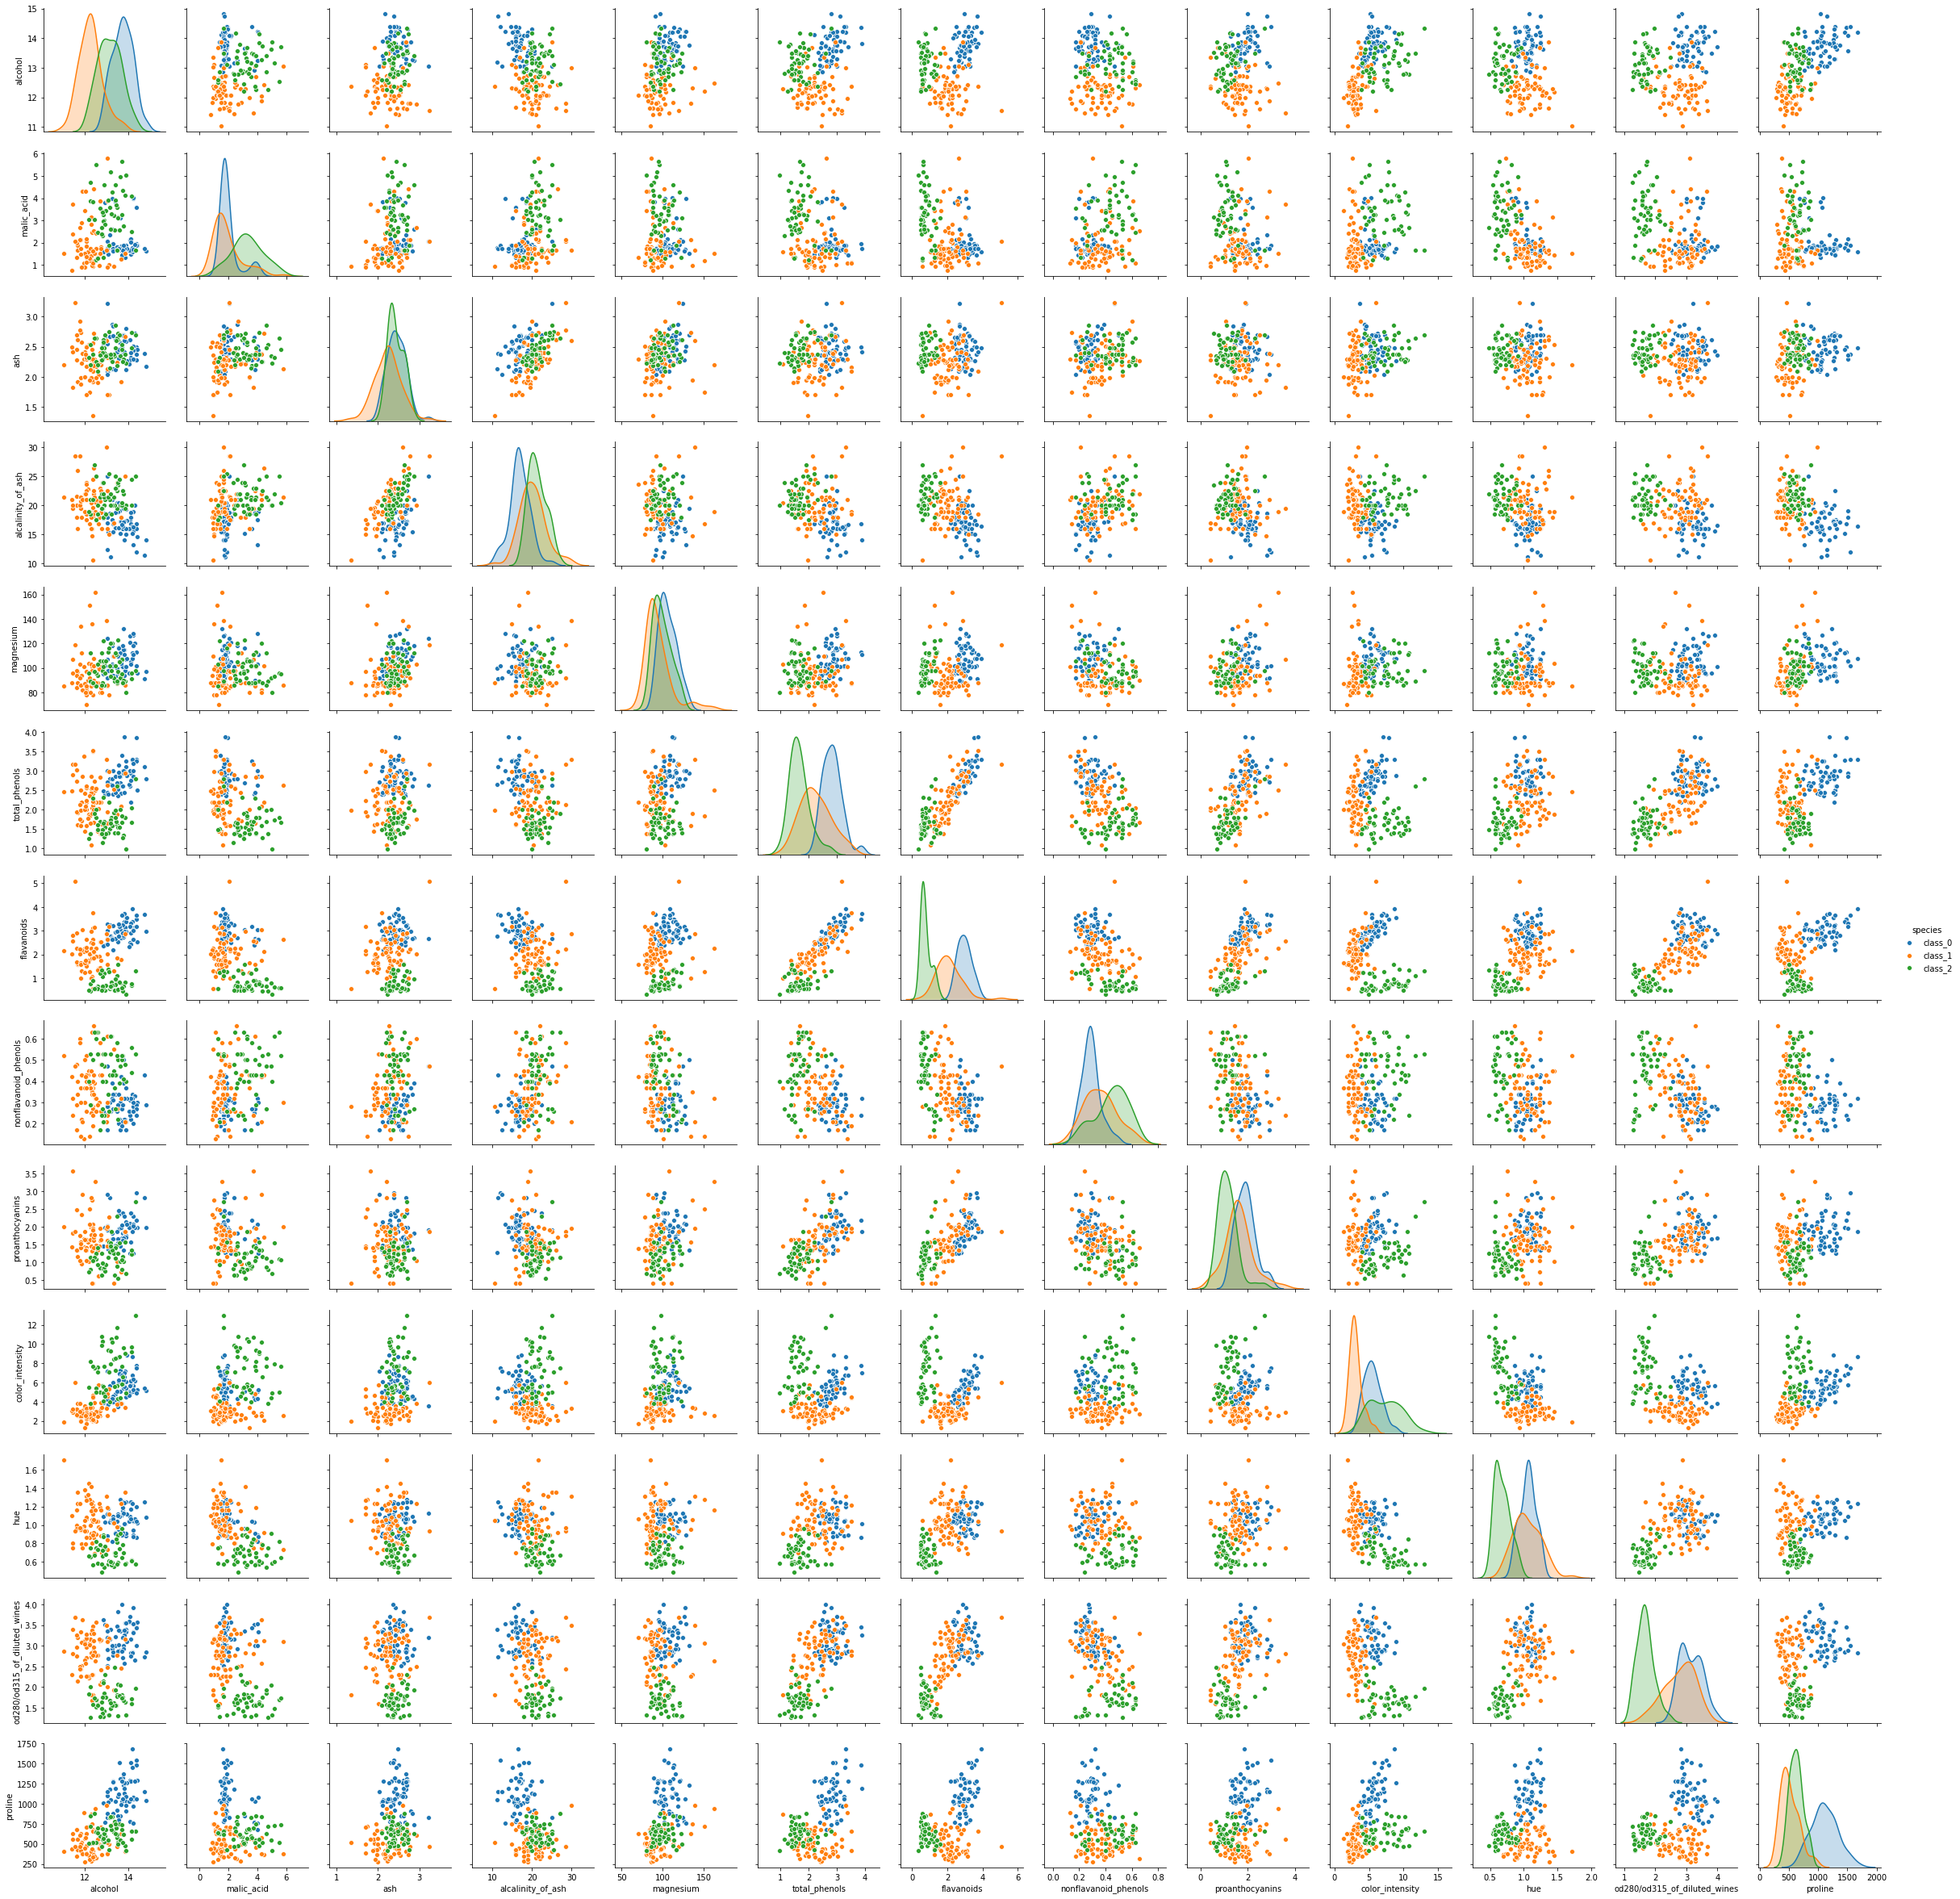

In [13]:
sns.pairplot(dataset, hue=class_column_name, vars=feature_names)
plt.savefig('plots/wine_pairplot.png')

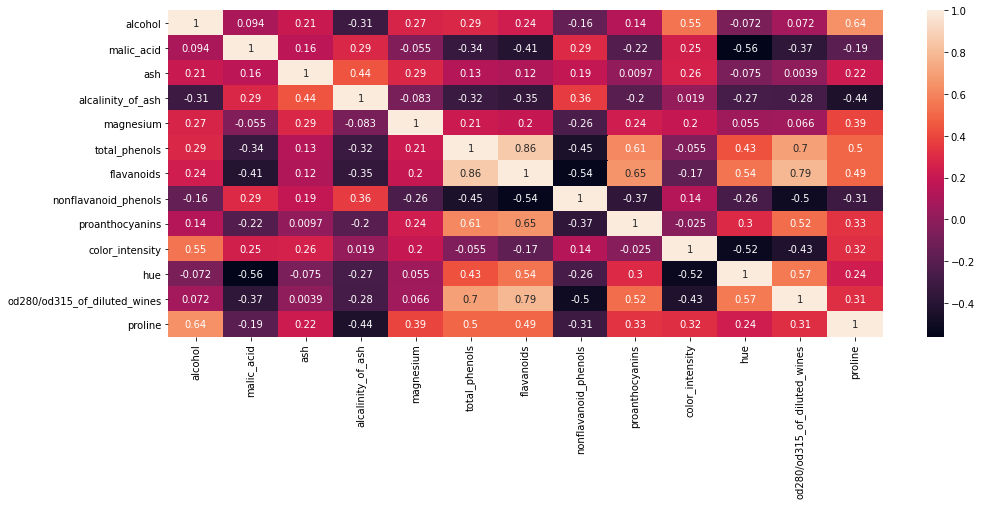

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(dataset[feature_names].corr(), annot=True)
plt.savefig('plots/wine_correlation.png')

## Model fitting

In [15]:
X, y = dataset[feature_names], dataset['y']

model_gnb = GaussianNB()

sk_fold = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
y_pred = cross_val_predict(model_gnb, X, y, cv=sk_fold)

print_score(y, y_pred)

Acc:           0.9662921348314607
f1 avg:        0.9676185189957479
Recall avg:    0.9689663404153736
Precision avg: 0.9667342064080389
Recall:        [0.94915254 0.95774648 1.        ]
Precision:     [0.98245614 0.95774648 0.96      ]
f1:            [0.96551724 0.95774648 0.97959184]
Confusion matrix:
[[56  3  0]
 [ 1 68  2]
 [ 0  0 48]]


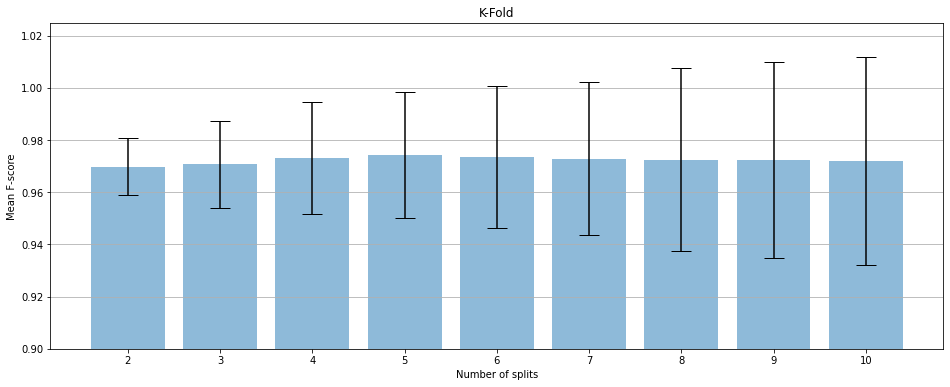

In [16]:
k_splits = list(range(2, 11))
results, errors = evaluate_cross_validation(model_gnb, X, y, KFold, k_splits)

_, ax = plt.subplots(figsize=(16, 6))
ax.bar(k_splits, results,
       yerr=errors,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean F-score')
ax.set_xlabel('Number of splits')
ax.set_xticks(k_splits)
ax.set_xticklabels(k_splits)
ax.set_ylim(.9, 1.025)
ax.set_title('K-Fold')
ax.yaxis.grid(True)
plt.savefig('plots/wine_kfold_results.png')

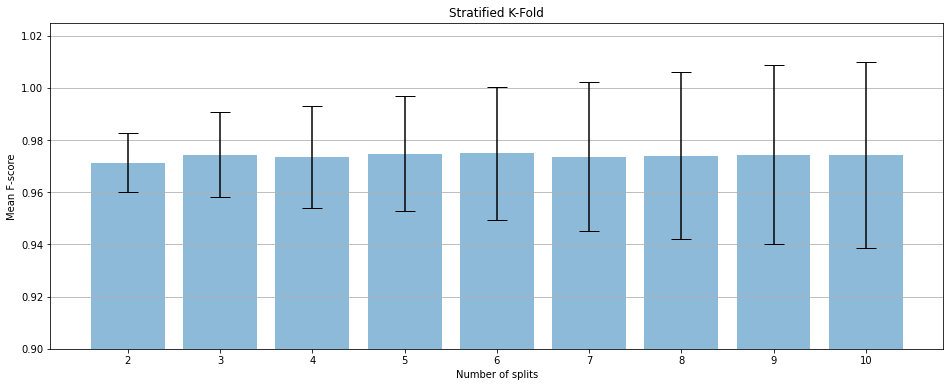

In [17]:
k_splits = list(range(2, 11))
results, errors = evaluate_cross_validation(model_gnb, X, y, StratifiedKFold, k_splits)

_, ax = plt.subplots(figsize=(16, 6))
ax.bar(k_splits, results,
       yerr=errors,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean F-score')
ax.set_xlabel('Number of splits')
ax.set_xticks(k_splits)
ax.set_xticklabels(k_splits)
ax.set_ylim(.9, 1.025)
ax.set_title('Stratified K-Fold')
ax.yaxis.grid(True)
plt.savefig('plots/wine_stratified_kfold_results.png')

## Discretization

In [18]:
model = MultinomialNB()
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
r = evaluation_all_features(dataset, feature_names, feature_names, class_column_name, model,
                            skfold, list(range(3, 16)), ['uniform', 'quantile', 'kmeans'])

data = pd.DataFrame(r, columns=['Number of bins', 'Strategy', 'F-score'])

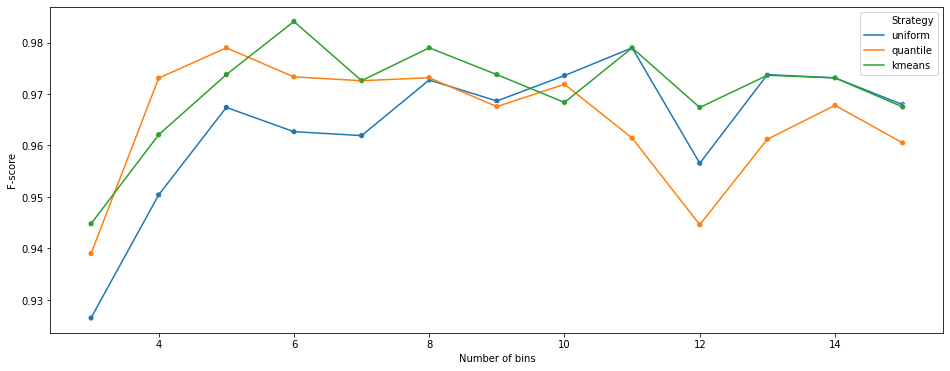

In [19]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="Number of bins", y="F-score", hue='Strategy', data=data, legend=None)
sns.lineplot(x="Number of bins", y="F-score", hue='Strategy', data=data)
plt.savefig('plots/wine_discretiztion_bin_strategy.png')

In [20]:
df = discretize_dataset(dataset, feature_names, n_bins=6, strategy='kmeans')
df[feature_names].describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     2.578652    1.544944    2.679775           2.185393    1.438202   
std      1.579170    1.302194    1.027165           1.122150    1.284018   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      1.000000    1.000000    2.000000           1.000000    0.000000   
50%      3.000000    1.000000    3.000000           2.000000    1.000000   
75%      4.000000    2.000000    3.750000           3.000000    2.000000   
max      5.000000    5.000000    5.000000           5.000000    5.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.325843    1.679775              2.174157         1.522472   
std         1.412417    1.286056              1.528636         1.150804   
min         0.000000    0.000000              0.000000         0.000000   
25%         1.000000    1.000000              1.000000         1.000000   
50%         3.000000    2.000000              2.000000         1.000000   
75%         3.000000    3.000000              3.000000         2.000000   
max         5.000000    5.000000              5.000000         5.000000   

       color_intensity         hue  od280/od315_of_diluted_wines     proline  
count       178.000000  178.000000                    178.000000  178.000000  
mean          1.471910    1.764045                      2.550562    1.516854  
std           1.311314    1.188670                      1.633071    1.466094  
min           0.000000    0.000000                      0.000000    0.000000  
25%           0.000000    1.000000                      1.000000    0.000000  
50%           1.000000    2.000000                      3.000000    1.000000  
75%           2.000000    3.000000                      4.000000    3.000000  
max           5.000000    5.000000                      5.000000    5.000000

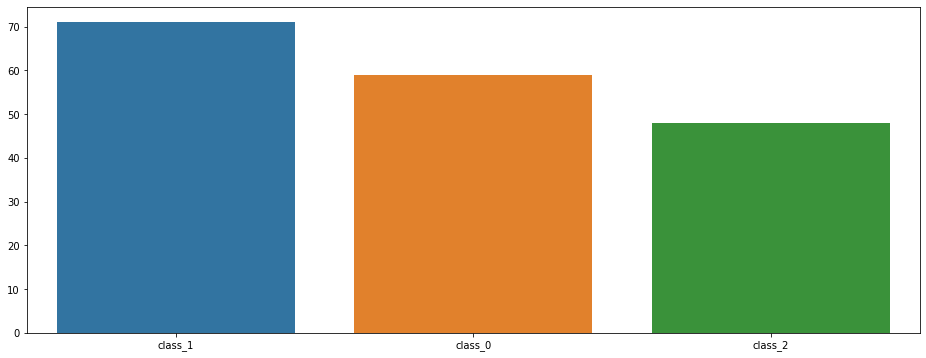

In [21]:
df_class_counts = df[class_column_name].value_counts()
plt.figure(figsize=(16, 6))
sns.barplot(df_class_counts.index, df_class_counts.values)
plt.savefig('plots/wine_class_dist_after_discretization.png')

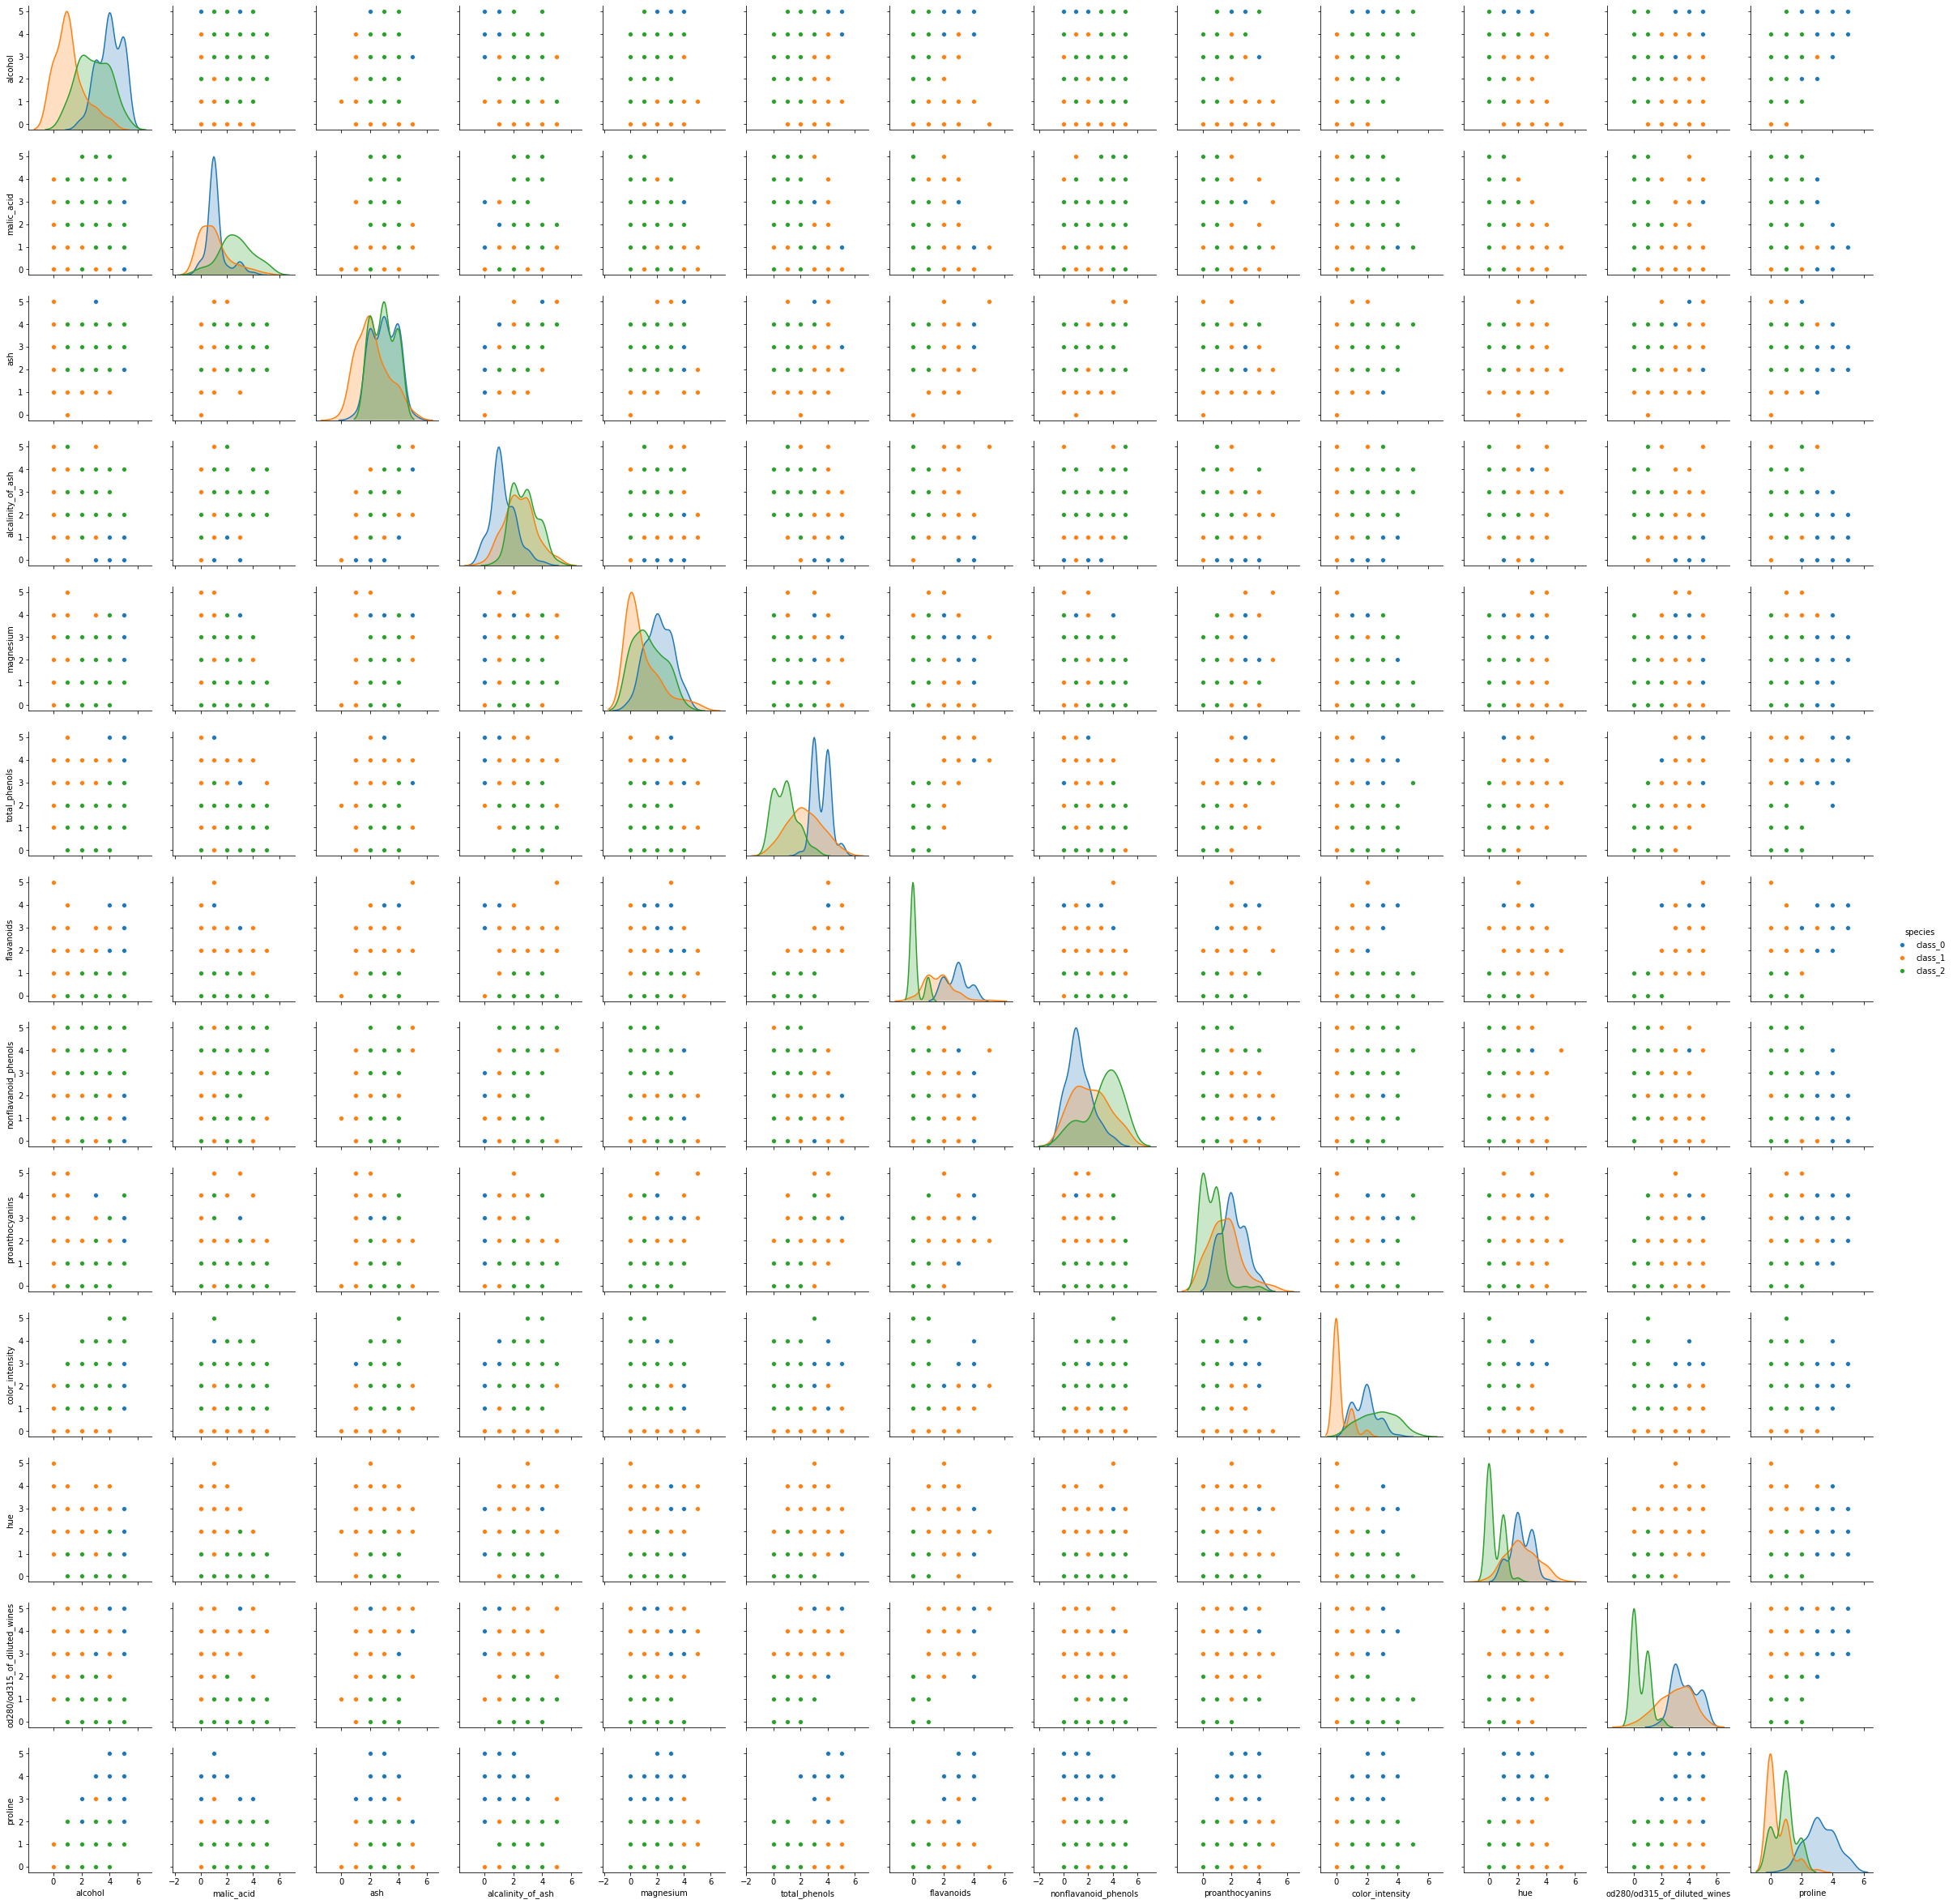

In [22]:
sns.pairplot(df, hue=class_column_name, vars=feature_names)
plt.savefig('plots/wine_pairplot_after_discretization.png')

In [23]:
X, y = df[feature_names].to_numpy(), df['y'].to_numpy()
X = OneHotEncoder().fit_transform(X)

model_mnb = MultinomialNB()

sk_fold = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
y_pred = cross_val_predict(model_mnb, X, y, cv=sk_fold)

print_score(y, y_pred)

Acc:           0.9831460674157303
f1 avg:        0.9838137737232894
Recall avg:    0.9859154929577465
Precision avg: 0.9822683171629306
Recall:        [1.         0.95774648 1.        ]
Precision:     [0.96721311 1.         0.97959184]
f1:            [0.98333333 0.97841727 0.98969072]
Confusion matrix:
[[59  0  0]
 [ 2 68  1]
 [ 0  0 48]]
